In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [2]:
# import dataset
claimants=pd.read_csv(r'C:\Users\cheth\OneDrive\Desktop\ExcelR\Assignments\LogisticRegression\claimants.csv')

In [3]:
claimants.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,Unnamed: 7
0,5,0,0.0,1.0,0.0,50.0,34.940,NaN
1,3,1,1.0,0.0,0.0,18.0,0.891,NaN
2,66,1,0.0,1.0,0.0,5.0,0.330,NaN
3,70,0,0.0,1.0,1.0,31.0,0.037,NaN
4,96,1,0.0,1.0,0.0,30.0,0.038,NaN


In [4]:
claimants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CASENUM     1340 non-null   int64  
 1   ATTORNEY    1340 non-null   int64  
 2   CLMSEX      1328 non-null   float64
 3   CLMINSUR    1299 non-null   float64
 4   SEATBELT    1292 non-null   float64
 5   CLMAGE      1151 non-null   float64
 6   LOSS        1340 non-null   float64
 7   Unnamed: 7  1 non-null      object 
dtypes: float64(5), int64(2), object(1)
memory usage: 83.9+ KB


In [5]:
claimants.drop(['CASENUM'],inplace=True,axis=1)
claimants.drop(claimants.iloc[:,-1:],inplace=True,axis=1)

In [6]:
claimants.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [7]:
claimants.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [8]:
claimants.shape

(1340, 6)

In [9]:
claimants=claimants.dropna()
claimants.shape

(1096, 6)

In [10]:
# assigning x and y variable

x=claimants.iloc[:,1:]
y=claimants.iloc[:,0]

In [11]:
classifier=LogisticRegression()
classifier.fit(x,y)

LogisticRegression()

In [12]:
y_pred=classifier.predict(x)

In [13]:
y_pred_df=pd.DataFrame({'actual':y,'predicted_Value':classifier.predict(x)})

In [14]:
y_pred_df

,actual,predicted_Value
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
1334,1,1
1336,0,0
1337,1,1
1338,0,0


In [18]:
#confusion matrix for the model accuracy

SyntaxError: cannot assign to function call (<ipython-input-18-16876452f51c>, line 3)

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y,y_pred)
print(confusion_matrix)

[[381 197]
 [123 395]]


In [20]:
(381+395)/(381+197+123+395)

0.708029197080292

In [21]:
#ROC curve

Text(0, 0.5, 'True Positive rate')

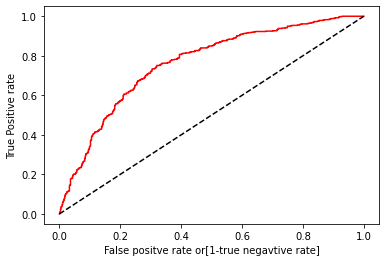

In [25]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds=roc_curve(y,classifier.predict_proba(x)[:,1])
auc=roc_auc_score(y,y_pred)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color='red',label='logit moodel(area=%.2f))'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False positve rate or[1-true negavtive rate]')
plt.ylabel('True Positive rate')

In [26]:
auc

0.7108589063606365